In [263]:
! pip install --upgrade matplotlib

'pip' is not recognized as an internal or external command,
operable program or batch file.


In [264]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns

# Question

What nutrients cause the most change in cereal ratings?

# Data Collection

<font color = 'orange'>Used "https://www.kaggle.com/datasets/crawford/80-cereals" to download csv file: 'cereal.csv'</font>

# Data Cleaning

In [265]:
cereal_df = pd.read_csv(r'cereal.csv')

In [266]:
cereal_df.dtypes

name         object
mfr          object
type         object
calories      int64
protein       int64
fat           int64
sodium        int64
fiber       float64
carbo       float64
sugars        int64
potass        int64
vitamins      int64
shelf         int64
weight      float64
cups        float64
rating      float64
dtype: object

In [267]:
cereal_df.isnull().sum()

name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

In [268]:
cereal_df = cereal_df.rename(columns = {'name': 'Name', 'sugars': 'Sugars', 'rating': 'Rating', 'protein': 'Protein', 'fat': 'Fat', 'sodium': 'Sodium', 'fiber': 'Fiber', 'carbo': 'Carbohydrates', 'potass': 'Potassium', 'vitamins': 'Vitamins', 'mfr': 'Manufacturer'})

In [269]:
nutrient_rating = cereal_df[['Name', 'Sugars', 'Protein', 'Fat', 'Sodium', 'Fiber', 'Carbohydrates', 'Potassium', 'Vitamins', 'Rating']]
nutrient_rating

,Name,Sugars,Protein,Fat,Sodium,Fiber,Carbohydrates,Potassium,Vitamins,Rating
0,100% Bran,6,4,1,130,10.0,5.0,280,25,68.402973
1,100% Natural Bran,8,3,5,15,2.0,8.0,135,0,33.983679
2,All-Bran,5,4,1,260,9.0,7.0,320,25,59.425505
3,All-Bran with Extra Fiber,0,4,0,140,14.0,8.0,330,25,93.704912
4,Almond Delight,8,2,2,200,1.0,14.0,-1,25,34.384843
...,...,...,...,...,...,...,...,...,...,...
72,Triples,3,2,1,250,0.0,21.0,60,25,39.106174
73,Trix,12,1,1,140,0.0,13.0,25,25,27.753301
74,Wheat Chex,3,3,1,230,3.0,17.0,115,25,49.787445
75,Wheaties,3,3,1,200,3.0,17.0,110,25,51.592193


The last cell is where I created the dataframe that I used the most throughout this project. The cell before renamed the column names to make them look cleaner.

# Data Visulization

In [270]:
nutrient_rating.describe()

,Sugars,Protein,Fat,Sodium,Fiber,Carbohydrates,Potassium,Vitamins,Rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,6.922078,2.545455,1.012987,159.675325,2.151948,14.597403,96.077922,28.246753,42.665705
std,4.444885,1.094790,1.006473,83.832295,2.383364,4.278956,71.286813,22.342523,14.047289
min,-1.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000,18.042851
25%,3.000000,2.000000,0.000000,130.000000,1.000000,12.000000,40.000000,25.000000,33.174094
50%,7.000000,3.000000,1.000000,180.000000,2.000000,14.000000,90.000000,25.000000,40.400208
75%,11.000000,3.000000,2.000000,210.000000,3.000000,17.000000,120.000000,25.000000,50.828392
max,15.000000,6.000000,5.000000,320.000000,14.000000,23.000000,330.000000,100.000000,93.704912


C:\Users\rwlow\AppData\Local\Temp\ipykernel_17972\2270378208.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(nutrient_rating.corr())


<AxesSubplot: >

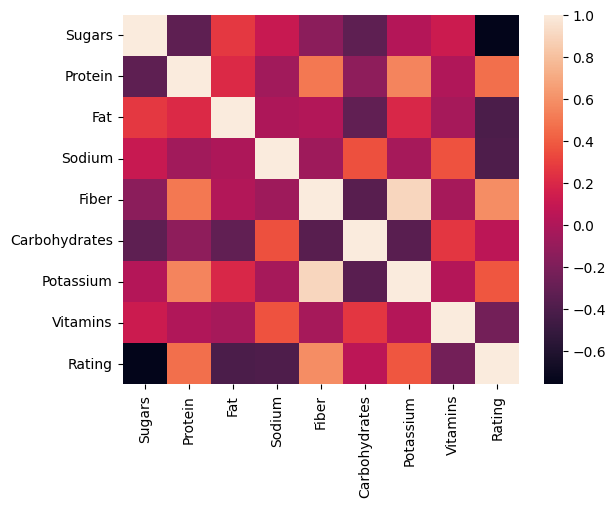

In [271]:
sns.heatmap(nutrient_rating.corr())

I created the heatmap above as an easy first graph. This heatmap is essentially what I am trying to figure but for specifically how the nutrients affect rating.

In [272]:
nutrient_rating.head()

,Name,Sugars,Protein,Fat,Sodium,Fiber,Carbohydrates,Potassium,Vitamins,Rating
0,100% Bran,6,4,1,130,10.0,5.0,280,25,68.402973
1,100% Natural Bran,8,3,5,15,2.0,8.0,135,0,33.983679
2,All-Bran,5,4,1,260,9.0,7.0,320,25,59.425505
3,All-Bran with Extra Fiber,0,4,0,140,14.0,8.0,330,25,93.704912
4,Almond Delight,8,2,2,200,1.0,14.0,-1,25,34.384843


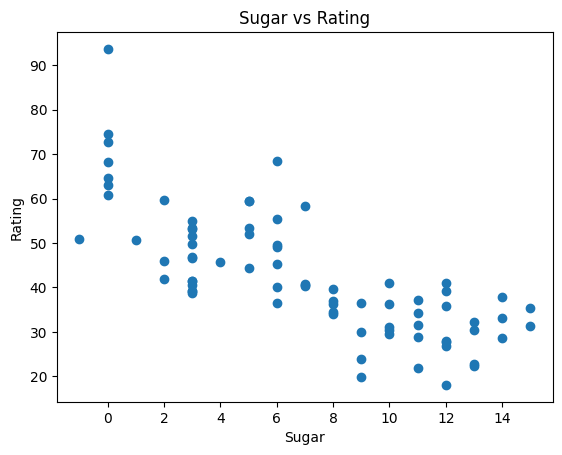

In [273]:
plt.scatter(nutrient_rating['Sugars'], nutrient_rating['Rating'])

plt.title('Sugar vs Rating')
plt.xlabel('Sugar')
plt.ylabel('Rating')
plt.show()

This was the first scatter plot I made for this data. I was curious to see how the amount of sugar affected the rating of the cereal as the amount of sugar is what lots of people look at when deciding what cereal to buy. This graph shows a negative correlation between sugar and cereal ratings.

In [274]:
df_float = nutrient_rating.select_dtypes(exclude = ['object']).copy()

In [275]:
rating = nutrient_rating['Rating'].copy()

In [276]:
df_float.drop(['Rating'], axis = 1, inplace = True)

In [277]:
df_float.shape

(77, 8)

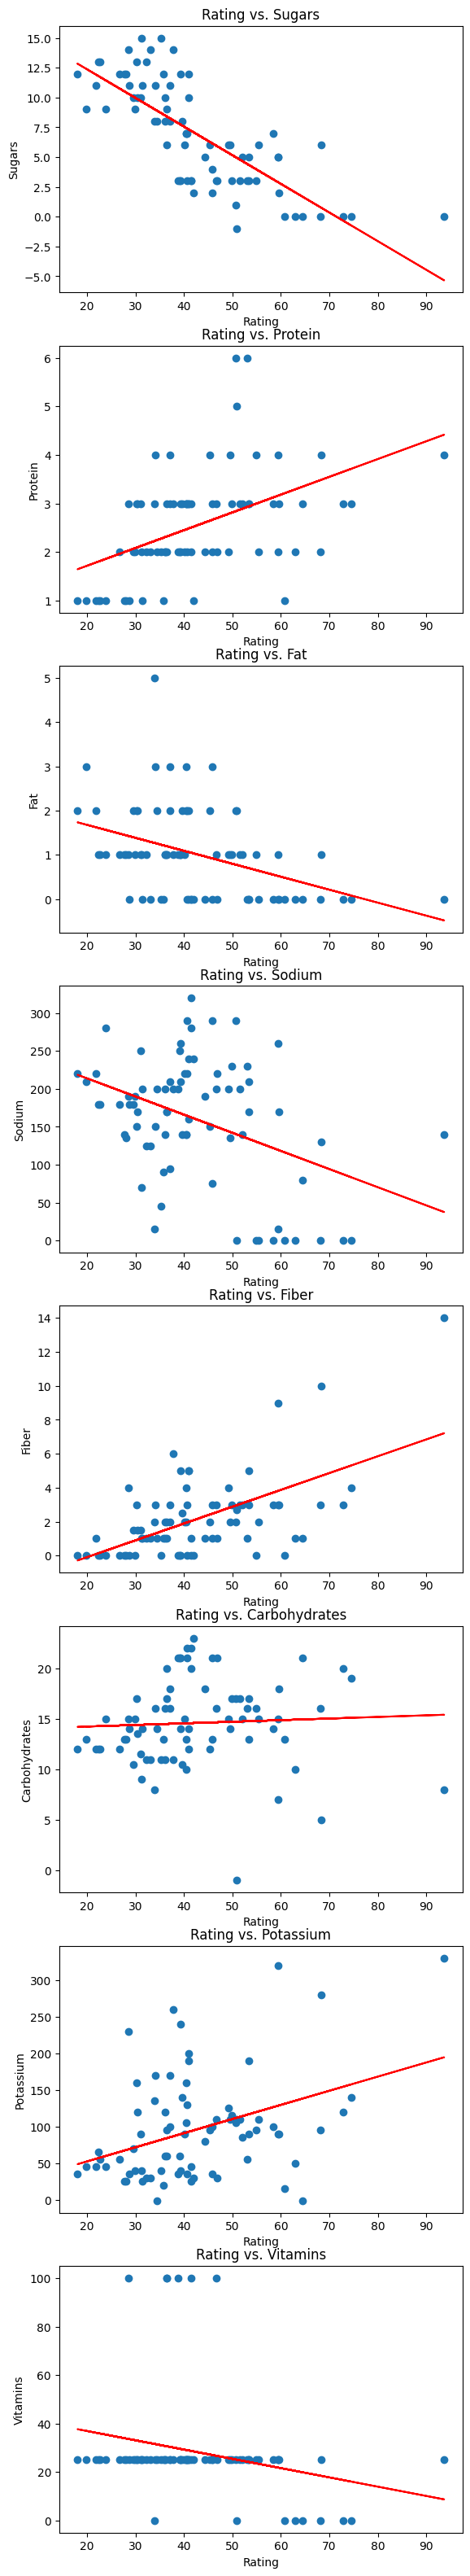

In [278]:
figure, axis = plt.subplots(8)
figure.set_figheight(40)
cols = df_float.columns.tolist()
for i in range(0, 8):
    axis[i].scatter(rating, df_float[cols[i]])
    axis[i].set_title(f"Rating vs. {cols[i]}")
    m, b = np.polyfit(rating, df_float[cols[i]], 1)
    axis[i].plot(rating, m*rating + b, color='red')
    axis[i].set_xlabel('Rating')
    axis[i].set_ylabel(cols[i])

The above 8 scatter plots show the relations with each of the nutrients with rating. The red line is the line of best fit and makes it easy to see positive and negative relationships. These graphs are what I'm looking for with the question I have. The data like protein, fat and vitamins don't seem to be as reliable as the others since the data points seem to have set amounts they can be. Like fat and protein can be 1, 2, 3, 4, 5, 6, but no values in between.

In [279]:
manufacture = cereal_df[['Manufacturer']]
manufacture

,Manufacturer
0,N
1,Q
2,K
3,K
4,R
...,...
72,G
73,G
74,R
75,G


In [280]:
count = manufacture.value_counts()
print(count)

Manufacturer
K               23
G               22
P                9
Q                8
R                8
N                6
A                1
dtype: int64


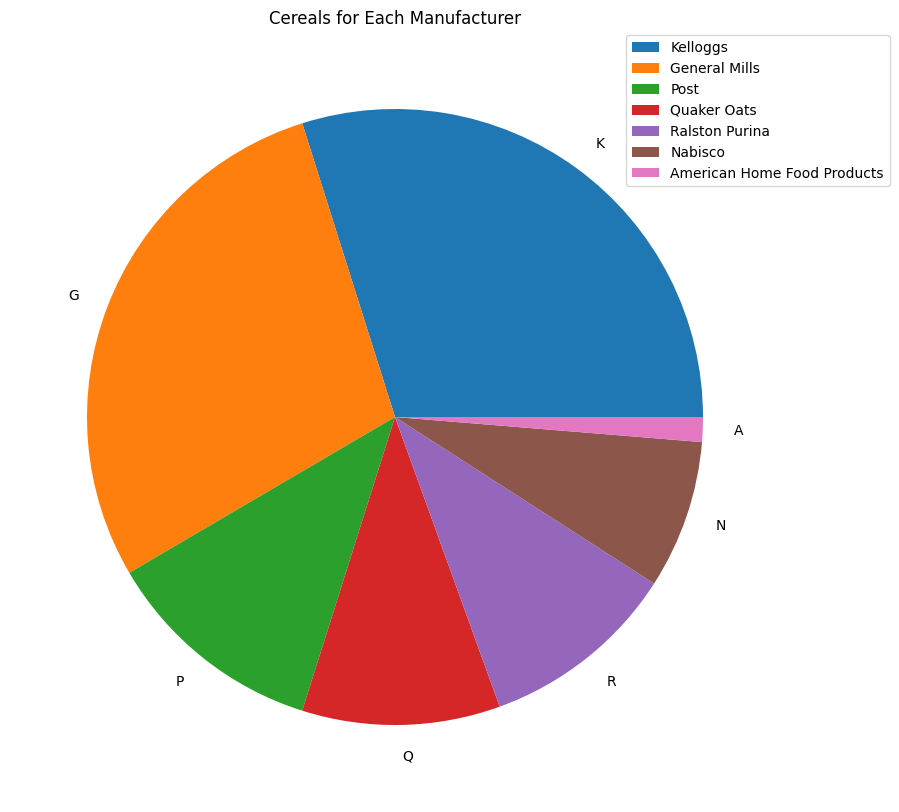

In [281]:
y = np.array([count[0], count[1], count[2], count[3], count[4], count[5], count[6]])
label = ['K', 'G', 'P', 'Q', 'R', 'N', 'A']
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.pie(y, labels = label)
plt.title('Cereals for Each Manufacturer')
legend = ['Kelloggs', 'General Mills', 'Post', 'Quaker Oats', 'Ralston Purina', 'Nabisco', 'American Home Food Products']
plt.legend(legend, loc = (.8,.8))

plt.show()

I made this pie graph above as I wanted to visualize how many of the cereals were from the different manufacturers. This pie graph doesn't answer my question, but it does help to see who the big manufacturers are and this could be used to assume who makes the best cereal.

# Data Modelling

In [282]:
df_preprocess = cereal_df.copy()

In [283]:
pd.set_option('display.max_columns', None)

In [284]:
df_preprocess.head()

,Name,Manufacturer,type,calories,Protein,Fat,Sodium,Fiber,Carbohydrates,Sugars,Potassium,Vitamins,shelf,weight,cups,Rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [285]:
df_preprocess_sub = df_preprocess.iloc[:, [1,4,5,6,7,8,9,10,11,15]]

I used this command above to get rid of the columns from the dataset that I didn't need.

In [286]:
df_preprocess_sub.head()

,Manufacturer,Protein,Fat,Sodium,Fiber,Carbohydrates,Sugars,Potassium,Vitamins,Rating
0,N,4,1,130,10.0,5.0,6,280,25,68.402973
1,Q,3,5,15,2.0,8.0,8,135,0,33.983679
2,K,4,1,260,9.0,7.0,5,320,25,59.425505
3,K,4,0,140,14.0,8.0,0,330,25,93.704912
4,R,2,2,200,1.0,14.0,8,-1,25,34.384843


In [287]:
X = df_preprocess_sub.iloc[:, list(range(0, df_preprocess_sub.shape[1] -1))]

In [288]:
y = df_preprocess_sub['Rating']

I want to compare the nutrients to rating of the cereal, so I made the rating y and the columns of the nutrients will be my x.

In [289]:
X.head()

,Manufacturer,Protein,Fat,Sodium,Fiber,Carbohydrates,Sugars,Potassium,Vitamins
0,N,4,1,130,10.0,5.0,6,280,25
1,Q,3,5,15,2.0,8.0,8,135,0
2,K,4,1,260,9.0,7.0,5,320,25
3,K,4,0,140,14.0,8.0,0,330,25
4,R,2,2,200,1.0,14.0,8,-1,25


In [290]:
cols = X.columns.tolist()
cols.remove('Manufacturer')

In [291]:
X[cols].join(pd.get_dummies(X[['Manufacturer']]))

,Protein,Fat,Sodium,Fiber,Carbohydrates,Sugars,Potassium,Vitamins,Manufacturer_A,Manufacturer_G,Manufacturer_K,Manufacturer_N,Manufacturer_P,Manufacturer_Q,Manufacturer_R
0,4,1,130,10.0,5.0,6,280,25,0,0,0,1,0,0,0
1,3,5,15,2.0,8.0,8,135,0,0,0,0,0,0,1,0
2,4,1,260,9.0,7.0,5,320,25,0,0,1,0,0,0,0
3,4,0,140,14.0,8.0,0,330,25,0,0,1,0,0,0,0
4,2,2,200,1.0,14.0,8,-1,25,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,2,1,250,0.0,21.0,3,60,25,0,1,0,0,0,0,0
73,1,1,140,0.0,13.0,12,25,25,0,1,0,0,0,0,0
74,3,1,230,3.0,17.0,3,115,25,0,0,0,0,0,0,1
75,3,1,200,3.0,17.0,3,110,25,0,1,0,0,0,0,0


In [292]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_stand = pd.DataFrame(scaler.fit_transform(X[cols]), columns=cols)

In [293]:
X_stand.head()

,Protein,Fat,Sodium,Fiber,Carbohydrates,Sugars,Potassium,Vitamins
0,1.337319,-0.012988,-0.356306,3.314439,-2.257639,-0.208807,2.596948,-0.14627
1,0.417912,3.987349,-1.737087,-0.064172,-1.551936,0.244099,0.549573,-1.27255
2,1.337319,-0.012988,1.204578,2.892113,-1.787170,-0.435260,3.161741,-0.14627
3,1.337319,-1.013072,-0.236238,5.003745,-1.551936,-1.567525,3.302939,-0.14627
4,-0.501495,0.987096,0.484170,-0.486498,-0.140530,0.244099,-1.370723,-0.14627


In [294]:
X = X_stand.join(pd.get_dummies(X[['Manufacturer']]))

In [295]:
X.head()

,Protein,Fat,Sodium,Fiber,Carbohydrates,Sugars,Potassium,Vitamins,Manufacturer_A,Manufacturer_G,Manufacturer_K,Manufacturer_N,Manufacturer_P,Manufacturer_Q,Manufacturer_R
0,1.337319,-0.012988,-0.356306,3.314439,-2.257639,-0.208807,2.596948,-0.14627,0,0,0,1,0,0,0
1,0.417912,3.987349,-1.737087,-0.064172,-1.551936,0.244099,0.549573,-1.27255,0,0,0,0,0,1,0
2,1.337319,-0.012988,1.204578,2.892113,-1.787170,-0.435260,3.161741,-0.14627,0,0,1,0,0,0,0
3,1.337319,-1.013072,-0.236238,5.003745,-1.551936,-1.567525,3.302939,-0.14627,0,0,1,0,0,0,0
4,-0.501495,0.987096,0.484170,-0.486498,-0.140530,0.244099,-1.370723,-0.14627,0,0,0,0,0,0,1


In [296]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X.iloc[:, 0:8], y)
y_pred = model.predict(X.iloc[:, 0:8])
print("Mean Squared Error:", mean_squared_error(y, y_pred))

Mean Squared Error: 3.0530718647189383


The cell above calculates the mean squared error for the 8 columns of nutrients that are then used to predict the cereal ratings for my model. The bar graph below is a graph of the calculated mean squared error.

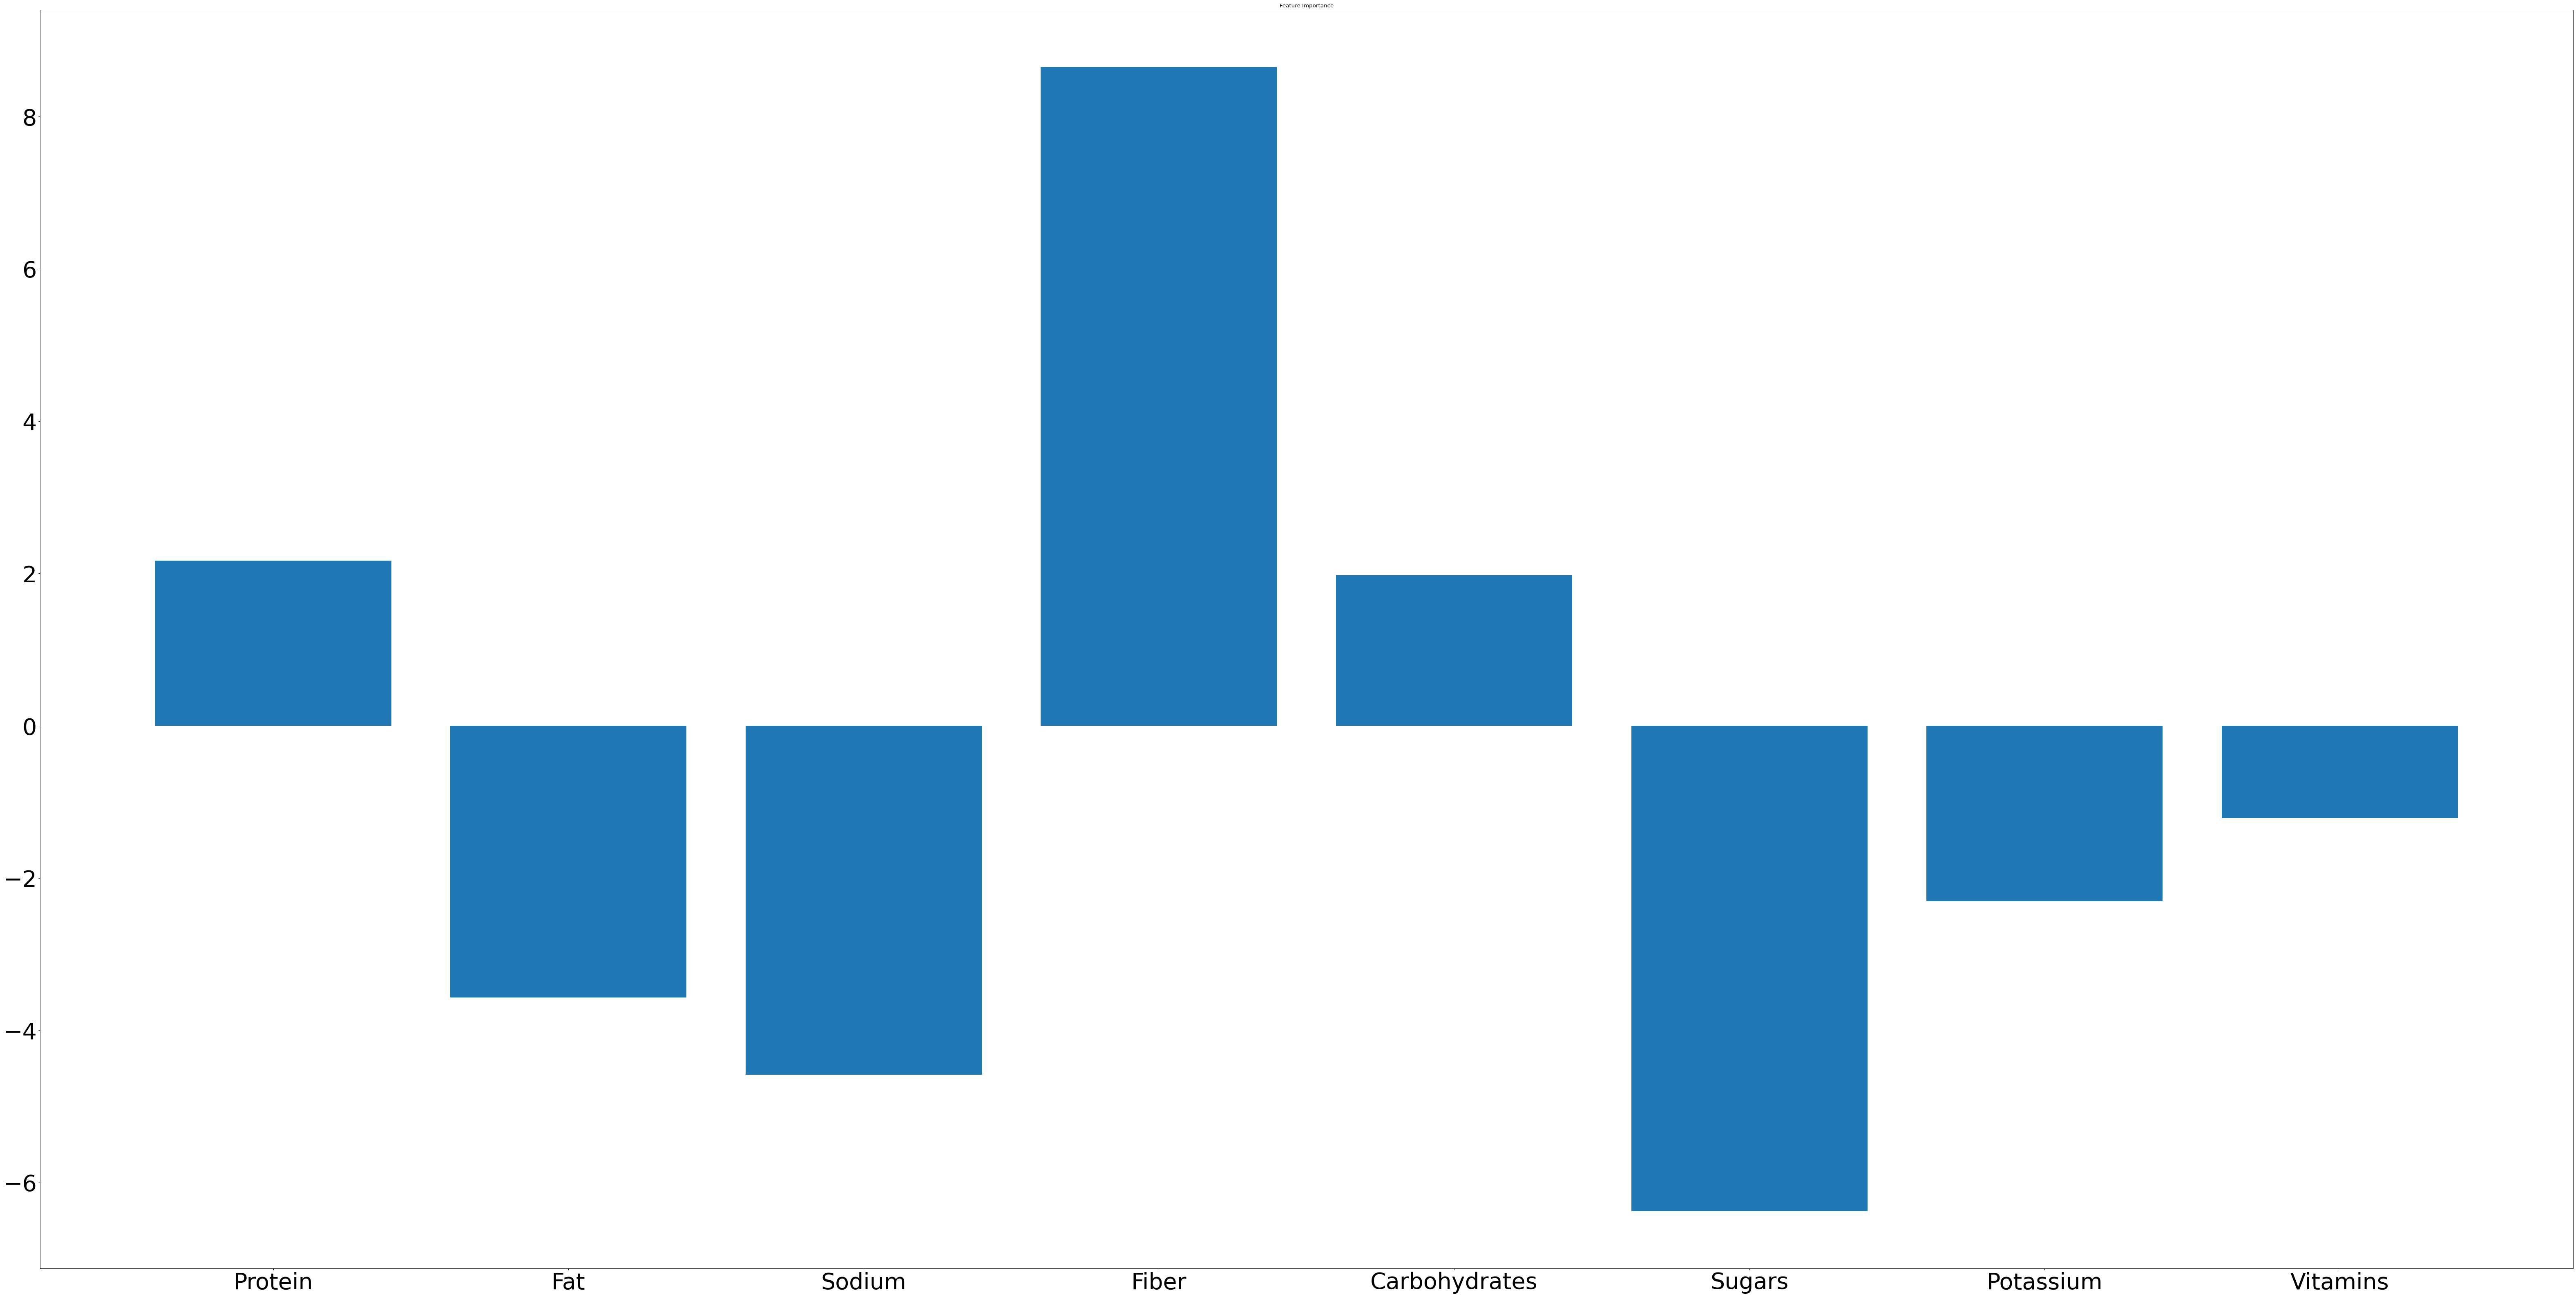

In [297]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(100, 50), dpi=80)
feature_importance = model.coef_
feature_names = X.iloc[:, 0:8].columns

plt.bar(feature_names, feature_importance)
plt.tick_params(axis='both', which='major', labelsize=50)
plt.title("Feature Importance")
plt.show()

In [298]:
temp = {"feature":cols, "feature_importance":feature_importance.ravel()}
pd.DataFrame(temp)

,feature,feature_importance
0,Protein,2.168041
1,Fat,-3.569311
2,Sodium,-4.584054
3,Fiber,8.648860
4,Carbohydrates,1.979622
5,Sugars,-6.376899
6,Potassium,-2.302657
7,Vitamins,-1.213576


In [299]:
# from sklearn import svm
# regr = svm.SVR(kernel='linear')
# regr.fit(X.iloc[:, 0:16], y)
# y_pred = regr.predict(X.iloc[:, 0:16])

from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X.iloc[:, 0:8], y)
y_pred = regressor.predict(X.iloc[:, 0:8])

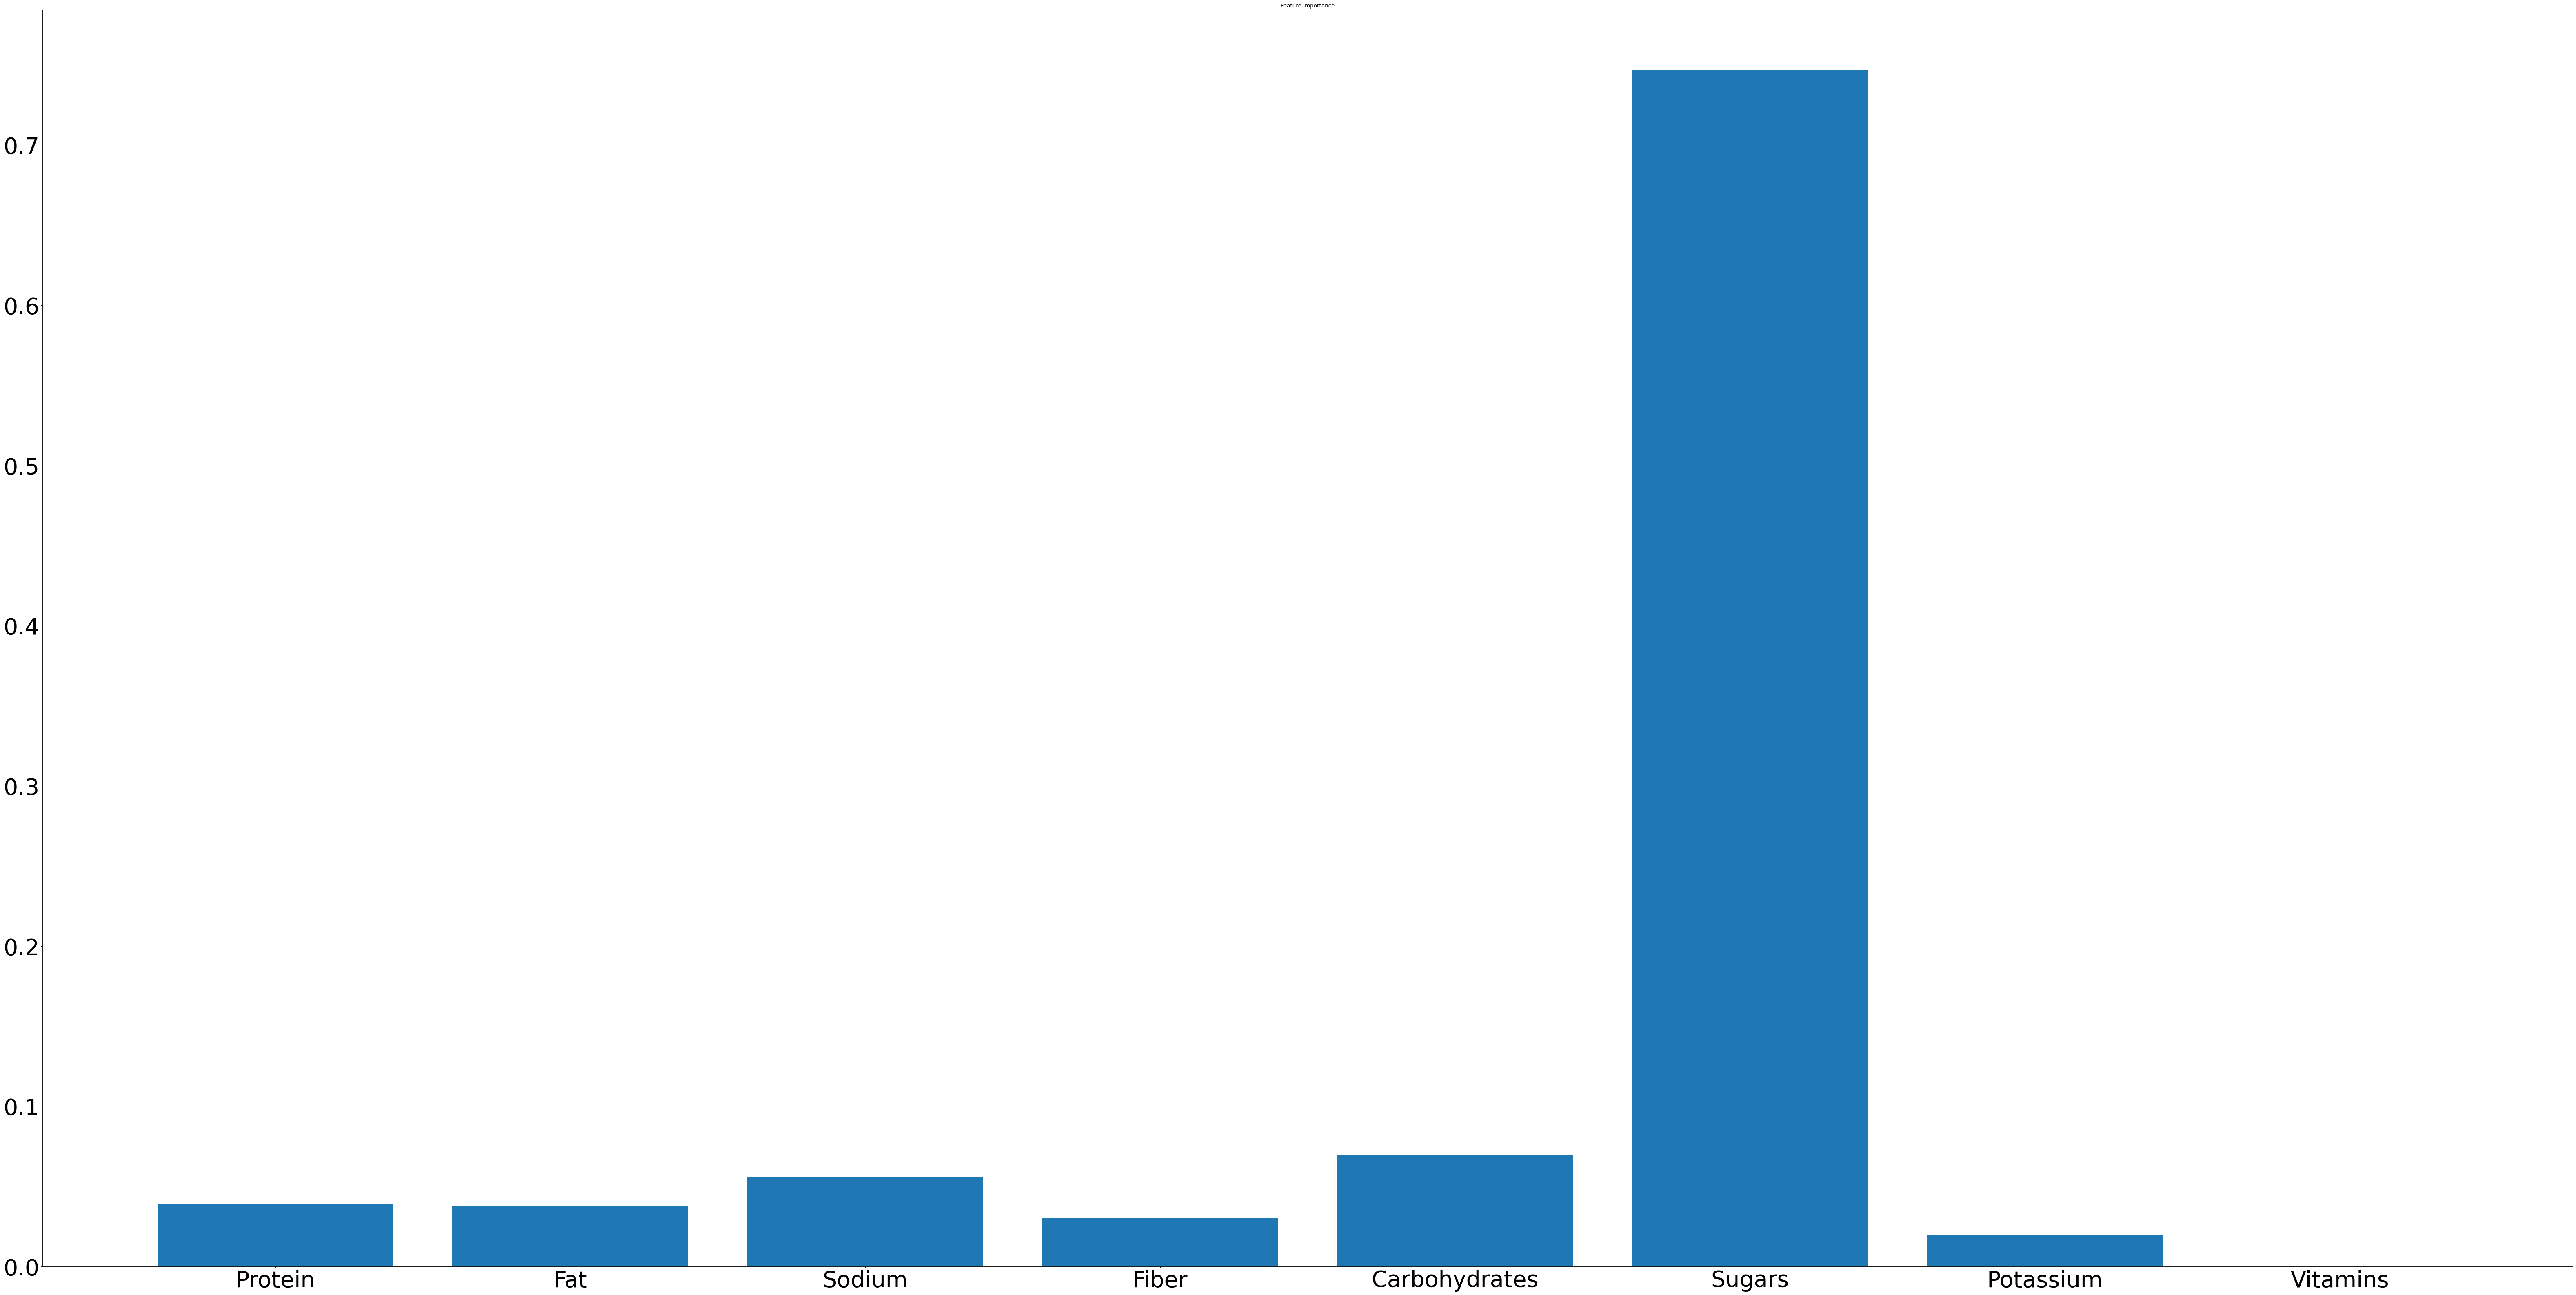

In [300]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(100, 50), dpi=80)
feature_importance_dt = regressor.feature_importances_
feature_names = X.iloc[:, 0:8].columns

plt.bar(feature_names, feature_importance_dt.ravel())
plt.tick_params(axis='both', which='major', labelsize=50)
plt.title("Feature Importance")
plt.show()

In [301]:
temp = {"feature":cols, "feature_importance":feature_importance_dt.ravel()}
pd.DataFrame(temp)

,feature,feature_importance
0,Protein,0.039205
1,Fat,0.037695
2,Sodium,0.055941
3,Fiber,0.030372
4,Carbohydrates,0.069834
5,Sugars,0.747009
6,Potassium,0.019914
7,Vitamins,0.000029


The last few cells create another bar graph comparing how the different nutrients affect the cereal rating. From this model, sugar seems to have the highest impact to the cereal and will be the biggest factor when predicting cereal rating. The graph also shows the vitamins has the lowest impact on cereal rating.

Conclusion: Within my code, I got contradicting results to what nutrient has the highest impact on rating. It seems that sugar has a big affect on rating of the cereal, but the first bar graph I created didn't support this claim as it had fiber having the largest impact on cereal rating.